In [1]:
import tensorflow as tf
import numpy as np
from utils import simulate_schrodinger, plot_schrodinger_model
from models import SchroedingerPinn

In [2]:
def f_init(tx):
    h = 2.0 / tf.cosh(tx[:, 1:2])
    return tf.concat([h, tf.zeros_like(h)], axis=1)

In [3]:
x_start = -5
length = 10
time = np.pi / 2
(tx_samples, y_samples), (tx_init, h_init), tx_boundary = simulate_schrodinger(1000, f_init, x_start, length, time)

2022-10-24 22:16:55.820435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:16:55.881189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:16:55.881713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-24 22:16:55.882709: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [4]:
network = SchroedingerPinn.build_network([8, 16, 32, 64, 32])
sch_pinn = SchroedingerPinn(network)
sch_pinn.compile()

In [5]:
inputs = tf.stack([tx_samples, tx_init, tx_boundary], axis=0)
outputs = tf.stack([h_init])

In [9]:
sch_pinn.fit(inputs, outputs, epochs = 10000, optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), progress_interval = 100, n_boundary_samples=1000)

Epoch: 0 Loss: 0.0274 Total Elapsed Time: 0.07
Epoch: 100 Loss: 0.0273 Total Elapsed Time: 3.33
Epoch: 200 Loss: 0.0273 Total Elapsed Time: 6.54
Epoch: 300 Loss: 0.0273 Total Elapsed Time: 9.74
Epoch: 400 Loss: 0.0273 Total Elapsed Time: 12.92
Epoch: 500 Loss: 0.0273 Total Elapsed Time: 16.00
Epoch: 600 Loss: 0.0273 Total Elapsed Time: 19.10
Epoch: 700 Loss: 0.0272 Total Elapsed Time: 22.21
Epoch: 800 Loss: 0.0272 Total Elapsed Time: 25.39
Epoch: 900 Loss: 0.0272 Total Elapsed Time: 28.55
Epoch: 1000 Loss: 0.0272 Total Elapsed Time: 31.66
Epoch: 1100 Loss: 0.0272 Total Elapsed Time: 34.80
Epoch: 1200 Loss: 0.0272 Total Elapsed Time: 38.01
Epoch: 1300 Loss: 0.0272 Total Elapsed Time: 41.14
Epoch: 1400 Loss: 0.0272 Total Elapsed Time: 44.32
Epoch: 1500 Loss: 0.0271 Total Elapsed Time: 47.46
Epoch: 1600 Loss: 0.0271 Total Elapsed Time: 50.73
Epoch: 1700 Loss: 0.0271 Total Elapsed Time: 54.04
Epoch: 1800 Loss: 0.0271 Total Elapsed Time: 57.37
Epoch: 1900 Loss: 0.0271 Total Elapsed Time: 60

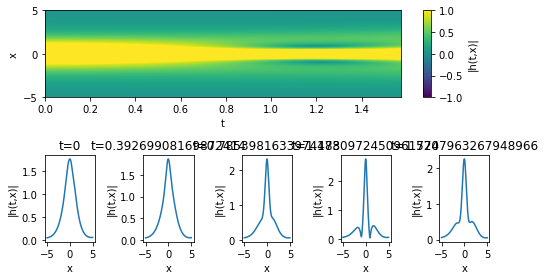

In [11]:
plot_schrodinger_model(sch_pinn.network, x_start, length, time)